In [39]:
pip install yfinance


In [40]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Set the ticker symbol for Apple
ticker_symbol = "AAPL"

# Create a ticker object
ticker = yf.Ticker(ticker_symbol)

# Set the start date (12 years ago from today)
# start_date = pd.Timestamp.now() - pd.DateOffset(years=12)
start_date = datetime.now() - timedelta(days=730)

# Download the historical data
# 'yfinance' provides data with daily granularity by default
data_hourly = ticker.history(start=start_date, interval="60m")

# Display the data
# print(data)



In [41]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Set the ticker symbol for Apple
ticker_symbol = "AAPL"

# Create a ticker object
ticker = yf.Ticker(ticker_symbol)

# Set the start date (12 years ago from today)
start_date = pd.Timestamp.now() - pd.DateOffset(years=13)
# start_date = datetime.now() - timedelta(days=730)

# Download the historical data
# 'yfinance' provides data with daily granularity by default
data_daily = ticker.history(start=start_date, interval="1d")

# Display the data
# print(data)


In [42]:

data_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3268 entries, 2012-01-17 00:00:00-05:00 to 2025-01-13 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3268 non-null   float64
 1   High          3268 non-null   float64
 2   Low           3268 non-null   float64
 3   Close         3268 non-null   float64
 4   Volume        3268 non-null   int64  
 5   Dividends     3268 non-null   float64
 6   Stock Splits  3268 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 204.2 KB


In [43]:
data_hourly.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [44]:
data_hourly.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-17 09:30:00-05:00,134.750000,137.289993,134.205002,136.690002,18958546,0.0,0.0
2023-01-17 10:30:00-05:00,136.699997,136.789993,134.679993,135.395004,10659894,0.0,0.0
2023-01-17 11:30:00-05:00,135.389999,136.139999,135.309998,135.589996,5683922,0.0,0.0
2023-01-17 12:30:00-05:00,135.589996,136.309998,135.559998,136.050003,5066835,0.0,0.0
2023-01-17 13:30:00-05:00,136.059998,136.399994,135.399994,135.660599,4414004,0.0,0.0


In [45]:
data_hourly.drop(["Stock Splits",'Dividends'],axis = 1,inplace=True)

In [46]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()


numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume']


data_hourly[numerical_columns] = scaler.fit_transform(data_hourly[numerical_columns])

In [47]:
data_hourly.reset_index(inplace=True)

In [48]:
data_hourly.drop('Datetime',axis=1,inplace=True)

In [49]:
data_hourly.tail()

,Open,High,Low,Close,Volume
3475,0.772973,0.779978,0.771558,0.785111,0.073642
3476,0.785429,0.787203,0.784174,0.793614,0.051696
3477,0.794146,0.791474,0.794395,0.795058,0.047411
3478,0.795505,0.793310,0.795273,0.796055,0.058251
3479,0.796625,0.797062,0.797549,0.801795,0.081065


In [50]:
predicted = data_hourly['Open']

In [51]:
predicted = list(predicted)[1:]

In [52]:
data_hourly.shape[0]

3480

In [53]:
data_hourly.drop(data_hourly.shape[0]-1,inplace=True)

In [54]:
data_hourly['Prediction'] = predicted

In [55]:
def calculate_difference(row):
    value1 = row['Open']
    value2 = row['Prediction']
    if value2-value1 == 0 or value1 ==0:
        return 0

    return round(((value2 - value1) / value1) * 100,2)


data_hourly['perc_diff'] = data_hourly.apply(calculate_difference,axis=1)

In [56]:
data_hourly

,Open,High,Low,Close,Volume,Prediction,perc_diff
0,0.005358,0.019639,0.003473,0.018041,0.335573,0.020953,291.05
1,0.020953,0.015647,0.007266,0.007653,0.188684,0.010477,-50.00
2,0.010477,0.010458,0.012296,0.009217,0.100607,0.012076,15.27
3,0.012076,0.011815,0.014293,0.012907,0.089685,0.015835,31.13
4,0.015835,0.012534,0.013015,0.009783,0.078129,0.012676,-19.95
...,...,...,...,...,...,...,...
3474,0.770154,0.774150,0.770121,0.772317,0.094824,0.772973,0.37
3475,0.772973,0.779978,0.771558,0.785111,0.073642,0.785429,1.61
3476,0.785429,0.787203,0.784174,0.793614,0.051696,0.794146,1.11
3477,0.794146,0.791474,0.794395,0.795058,0.047411,0.795505,0.17


In [57]:
def inc_dec(row):
    return int(row['perc_diff']>0)

data_hourly['change'] = data_hourly.apply(inc_dec,axis=1)

In [58]:
data_hourly.head()

,Open,High,Low,Close,Volume,Prediction,perc_diff,change
0,0.005358,0.019639,0.003473,0.018041,0.335573,0.020953,291.05,1
1,0.020953,0.015647,0.007266,0.007653,0.188684,0.010477,-50.00,0
2,0.010477,0.010458,0.012296,0.009217,0.100607,0.012076,15.27,1
3,0.012076,0.011815,0.014293,0.012907,0.089685,0.015835,31.13,1
4,0.015835,0.012534,0.013015,0.009783,0.078129,0.012676,-19.95,0


In [59]:
def collapse_1(row):
    # print(list(row[:5]),'\n--')
    return list(row[:5])

def collapse_2(row):
    # print(list(row[4:]),'\n--')
    return list(row[5:])

col1 = data_hourly.apply(collapse_1,axis=1)

col2 = data_hourly.apply(collapse_2,axis=1)


In [62]:
df_hourly = pd.DataFrame(data = {'data':col1,'pred':col2})

In [91]:
df_hourly['data'][0]

[0.005358270992642522,
 0.019639083210592823,
 0.0034733115579228535,
 0.01804055732014187,
 0.33557285803887404]

In [64]:
train_num = int(df_hourly.shape[0]*0.75)
test_num = int(df_hourly.shape[0]-train_num)

In [65]:
df_hourly.tail()

,data,pred
3474,"[0.7701536166224159, 0.7741498121765533, 0.770...","[0.7729726609687011, 0.37, 1.0]"
3475,"[0.7729726609687011, 0.7799776563371184, 0.771...","[0.785428636663001, 1.61, 1.0]"
3476,"[0.785428636663001, 0.7872026189667269, 0.7841...","[0.7941459403674678, 1.11, 1.0]"
3477,"[0.7941459403674678, 0.7914737644686547, 0.794...","[0.7955054907359351, 0.17, 1.0]"
3478,"[0.7955054907359351, 0.7933099111844883, 0.795...","[0.7966251276294534, 0.14, 1.0]"


In [66]:
df_hourly.shape[0]

3479

In [67]:
df_hourly_train = df_hourly[:train_num]
df_hourly_test = df_hourly[-test_num:df_hourly.shape[0]-150]
df_hourly_val = df_hourly[-150:]

In [68]:
df_hourly_train.to_csv("train.csv",index=False)
df_hourly_test.to_csv("test.csv",index=False)
df_hourly_val.to_csv('val.csv',index=False)

In [69]:
df_hourly_test['pred'][2622]

[0.7549984312880362, -0.15, 0.0]

In [70]:
df_hourly_train['pred']

,pred
0,"[0.0209532570206723, 291.05, 1.0]"
1,"[0.01047662851033615, -50.0, 0.0]"
2,"[0.012076092353752399, 15.27, 1.0]"
3,"[0.015834899502978672, 31.13, 1.0]"
4,"[0.012675876041124967, -19.95, 0.0]"
...,...
2604,"[0.7819897955012196, -0.41, 0.0]"
2605,"[0.8193538175835098, 4.78, 1.0]"
2606,"[0.8056622752900957, -1.67, 0.0]"
2607,"[0.8117402867075851, 0.75, 1.0]"


In [71]:
df_hourly_train


,data,pred
0,"[0.005358270992642522, 0.019639083210592823, 0...","[0.0209532570206723, 291.05, 1.0]"
1,"[0.0209532570206723, 0.015647385765861443, 0.0...","[0.01047662851033615, -50.0, 0.0]"
2,"[0.01047662851033615, 0.01045822781448602, 0.0...","[0.012076092353752399, 15.27, 1.0]"
3,"[0.012076092353752399, 0.0118153903276621, 0.0...","[0.015834899502978672, 31.13, 1.0]"
4,"[0.015834899502978672, 0.01253386663164835, 0....","[0.012675876041124967, -19.95, 0.0]"
...,...,...
2604,"[0.7852287494443, 0.7786204938239423, 0.780820...","[0.7819897955012196, -0.41, 0.0]"
2605,"[0.7819897955012196, 0.7747085864740075, 0.767...","[0.8193538175835098, 4.78, 1.0]"
2606,"[0.8193538175835098, 0.8174995879542053, 0.795...","[0.8056622752900957, -1.67, 0.0]"
2607,"[0.8056622752900957, 0.8101557319925026, 0.804...","[0.8117402867075851, 0.75, 1.0]"


In [72]:
df_hourly_test

,data,pred
2609,"[0.8096609959142709, 0.8067220779435937, 0.805...","[0.8043786283709764, -0.65, 0.0]"
2610,"[0.8043786283709764, 0.7980999968449414, 0.799...","[0.800783831247351, -0.45, 0.0]"
2611,"[0.800783831247351, 0.8002555475738391, 0.8000...","[0.8037428454592346, 0.37, 1.0]"
2612,"[0.8037428454592346, 0.798020084933206, 0.7930...","[0.8087412462394539, 0.62, 1.0]"
2613,"[0.8087412462394539, 0.8098355970778066, 0.792...","[0.7977447645229716, -1.36, 0.0]"
...,...,...
3324,"[0.8829174650053979, 0.8974038252224166, 0.883...","[0.8989523737583469, 1.82, 1.0]"
3325,"[0.8989523737583469, 0.8974134487605676, 0.898...","[0.9016714744952816, 0.3, 1.0]"
3326,"[0.9016714744952816, 0.8956179889022333, 0.893...","[0.9021913277014275, 0.06, 1.0]"
3327,"[0.9021913277014275, 0.8946192118224803, 0.896...","[0.8958333765527409, -0.7, 0.0]"


In [93]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import ast

# Function to safely evaluate strings to lists and handle 'inf' values
def safe_eval(value):
    try:
        # Use ast.literal_eval for safer evaluation
        lst = ast.literal_eval(value)
        # Replace 'inf' with a large number
        return [float('inf') if x == 'inf' else float('-inf') if x == '-inf' else x for x in lst]
    except:
        return np.nan  # Return NaN for invalid entries

# Load the datasets
train_df = pd.read_csv('train.csv')
val_df = pd.read_csv('val.csv')
test_df = pd.read_csv('test.csv')

# Convert 'data' and 'pred' columns from string representation of lists to actual lists
train_df['data'] = train_df['data'].apply(safe_eval)
train_df['pred'] = train_df['pred'].apply(safe_eval)
val_df['data'] = val_df['data'].apply(safe_eval)
val_df['pred'] = val_df['pred'].apply(safe_eval)
test_df['data'] = test_df['data'].apply(safe_eval)
test_df['pred'] = test_df['pred'].apply(safe_eval)

# Drop rows with NaN values (if any)
train_df.dropna(inplace=True)
val_df.dropna(inplace=True)
test_df.dropna(inplace=True)

# Extract features and labels and converts into np array
X_train = np.stack(train_df['data'].values)
y_train = np.stack(train_df['pred'].values)
X_val = np.stack(val_df['data'].values)
y_val = np.stack(val_df['pred'].values)
X_test = np.stack(test_df['data'].values)
y_test = np.stack(test_df['pred'].values)

# Check the shapes of the arrays
print("Shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create TensorDataset and DataLoader for training and validation data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define the neural network model using Sequential
model = nn.Sequential(
    nn.Linear(5, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 3)
)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        # Evaluate on validation data
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for val_X, val_y in val_loader:
                val_outputs = model(val_X)
                val_loss += criterion(val_outputs, val_y).item()
        val_loss /= len(val_loader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}')

# Save the model
torch.save(model.state_dict(), 'trained_model.pth')

# Load the model and make predictions
model.load_state_dict(torch.load('trained_model.pth'))
model.eval()

# Function to make predictions
def predict(model, input_data):
    if isinstance(input_data, list):
        input_data = np.array(input_data)
    input_tensor = torch.tensor(input_data, dtype=torch.float32)
    with torch.no_grad():
        output = model(input_tensor)
    output_array = output.numpy()
    return output_array

# Make predictions on the validation set
val_predictions = predict(model, X_val)


Shapes:
X_train: (2609, 5), y_train: (2609, 3)
X_val: (150, 5), y_val: (150, 3)
X_test: (720, 5), y_test: (720, 3)
Epoch [10/50], Training Loss: 1.3015, Validation Loss: 0.4822
Epoch [20/50], Training Loss: 0.6787, Validation Loss: 0.7637
Epoch [30/50], Training Loss: 8.2421, Validation Loss: 0.4968
Epoch [40/50], Training Loss: 2.8787, Validation Loss: 0.4804
Epoch [50/50], Training Loss: 0.7307, Validation Loss: 0.4836


<ipython-input-93-48ee4248bbf0>:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('trained_model.pth'))


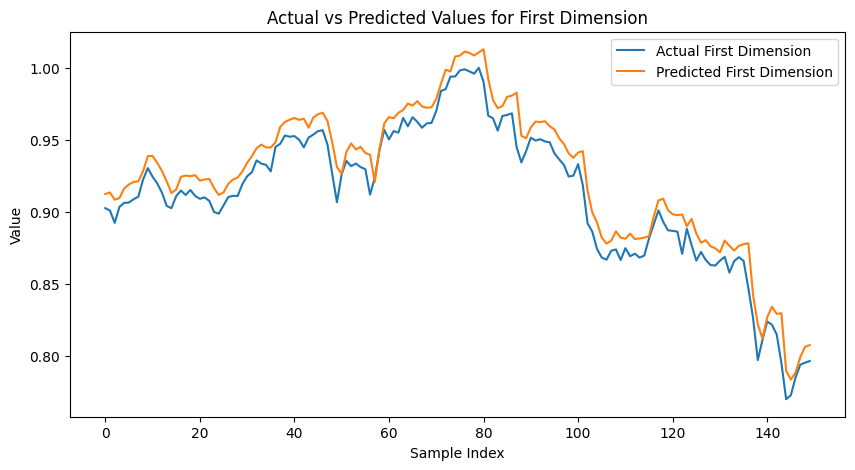

In [96]:
# Plot the predictions against the actual values for the first dimension
plt.figure(figsize=(10, 5))
plt.plot(y_val[:, 0], label='Actual First Dimension')
plt.plot(val_predictions[:, 0], label='Predicted First Dimension')
plt.title('Actual vs Predicted Values for First Dimension')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

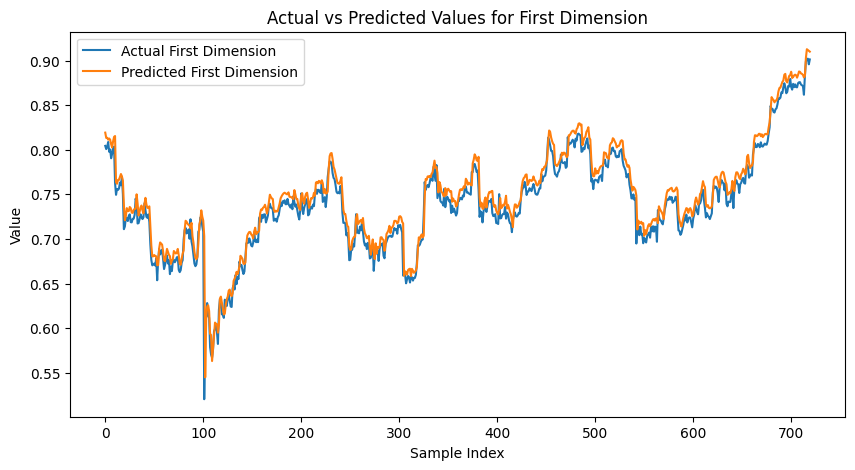

In [97]:
test_predictions = predict(model, X_test)
plt.figure(figsize=(10, 5))
plt.plot(y_test[:, 0], label='Actual First Dimension')
plt.plot(test_predictions[:, 0], label='Predicted First Dimension')
plt.title('Actual vs Predicted Values for First Dimension')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()